In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [1]:
# Connection to google drive.
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
#  loading the data from the .npy file in drive
data = np.load('/content/gdrive/MyDrive/RiceLeaf_or_not_dataset/modified_labeled_Data.npy')
data.shape

(14996, 25089)

In [ ]:
#save features to X and labels to y
X = data[:,:-1]
y = data[:,-1]


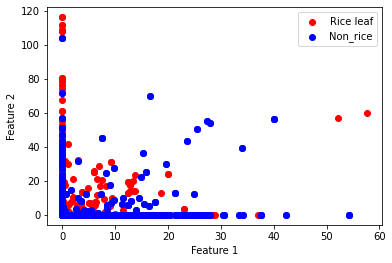

In [ ]:
# plot the data points for rice in red
plt.scatter(X[y == 1,0],X[y == 1,1], c='r' ,label ='Rice leaf')
# plot the data points for non_rice in blue
plt.scatter(X[y == 0,0],X[y == 0,1] ,c ='b' ,label = 'Non_rice' )
#add labels and legends
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## here scatter plot fails to show the high dimensional features so using way to reduce the dimensionaltiy of the feature space and to visulaize the data to use dimensionality reduciton techniques

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
#save features to X and labels to y
features = data[:,:-1]
label = data[:,-1]


In [ ]:
#apply pca to reduce the dimensionality of the data
pca = PCA(n_components = 2)
X = pca.fit_transform(features)

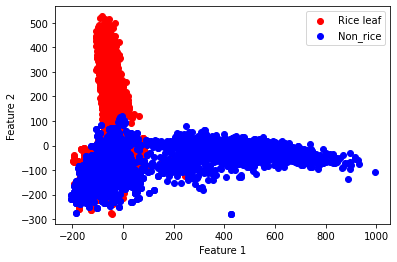

In [ ]:
# plot the data points for rice in red
plt.scatter(X[label == 1,0],X[label == 1,1], c='r' ,label ='Rice leaf')
# plot the data points for non_rice in blue
plt.scatter(X[label == 0,0],X[label == 0,1] ,c ='b' ,label = 'Non_rice' )
#add labels and legends
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

due to high dimensionality we better use non_linear kernel such as RBF

# New Section

# this section is based on finding optimal hyper parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np


In [ ]:
#  loading the data from the .npy file in drive
data = np.load('/content/gdrive/MyDrive/RiceLeaf_or_not_dataset/modified_labeled_Data.npy')
data.shape

(14996, 25089)

In [ ]:
#save features to X and labels to y
X = data[:,:-1]
y = data[:,-1]


In [ ]:
# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'class_weight': [None, 'balanced']
}

In [ ]:
# Create an SVM classifier with an RBF kernel
svm = SVC(kernel='rbf')

In [ ]:
# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X, y)

In [ ]:
# Print the best hyperparameters and mean cross-validation score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)